# Simple Moving Average and Exponential Moving Average Comparison Demo

In this notebook, we will demonstrate how the simple and exponential moving average differ. We will plot exponential moving average (EMA) and simple moving average (SMA) lines of different periods, and see how they track a signal value differently.

[Moving Averages on Wikipedia](https://en.wikipedia.org/wiki/Moving_average)

## Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Exponential Moving Average (EMA) Functions

In [2]:
# Calculate the alpha value for a desired period.
def calculateAlpha(ema_period):
    alpha = 2.0 / (ema_period + 1)
    return alpha


# Returns the denominator
def getDenominator(number_of_terms):
    # bottom = 1 + (1-a) + (1-a)^2 + (1-a)^3 + ...
    
    a = calculateAlpha(number_of_terms)
    
    i = 0
    total = 0
    while i < number_of_terms:
        term = (1-a)**i
        total = total + term
        i = i + 1
    return total


# Returns the numerator
def getNumerator(price_data, price_data_index, number_of_terms):
    # top = p1 + (1-a)*p2 + (1-a)^2*p3 + (1-a)^3*p4 + ...
    
    a = calculateAlpha(number_of_terms)
    
    i = 0
    total = 0
    while i < number_of_terms:
        #print("term number:", i)
        price = price_data[price_data_index - i]
        #print("price:", price)
        cof = (1-a)**i
        #print("cof:", cof)
        term = price * cof
        #print("term:", term)
        #print(" ")
        total = total + term
        i = i + 1
    return total


# Returns a single Exponential Moving Average value.
def getEMA(price_data, price_data_index, number_of_terms):
    #print("index:",price_data_index,"alpha:",alpha,"number_of_terms:",number_of_terms)
    if (number_of_terms - price_data_index) > 1:
        #print("too many terms for this index")
        return 0
    else:
        top = getNumerator(price_data, price_data_index, number_of_terms)
        bottom = getDenominator(number_of_terms)
        #print("top:", top)
        #print("bottom:", bottom)
        EMA = top / bottom
        return EMA


# Returns a list of all EMA values.
def getEMAdataset(price_data, number_of_terms):
    ema_data = []
    i = 0
    while i < len(price_data):
        datum = getEMA(price_data, i, number_of_terms)
        ema_data.append(datum)
        i = i + 1
    return ema_data



## Simple Moving Average (SMA) Functions

In [3]:
# Calculates the average given a list of numbers.
def getAvg(data):
    total = 0
    i = 0
    while i < len(data):
        total = total + data[i]
        i = i + 1
    # Catch divide by zero errors.
    if i == 0: 
        return 0
    else:
        return total / i

    
# Produces a subset list given a list of numbers, the final 
#desired index, and the desired subset length.
def getMovingList(data, index, length):
    listEnd = index + 1
    listStart = index - length + 1
    result = data[listStart:listEnd]
    # Note that when index - length < -1, then the result will be [] (empty)
    return result


# Calculates a single average.
def getSingleSMA(data, index, sma_period):
    movingList = getMovingList(data, index, sma_period)
    average = getAvg(movingList)
    return average


# Calculates the entire list of averages.
def getSMAlist(data, sma_period):
    smaList = []
    i = 0
    while i < len(data):
        value = getSingleSMA(data, i, sma_period)
        smaList.append(value)
        i = i + 1
    return smaList


## Plotting Function

In [4]:
# Plots 3 lines: raw data, EMA(period_1), EMA(period_2)
def calculateAndPlotSMAandEMA(data, ema_period_1, sma_period_1):
    ema_1 = getEMAdataset(data, ema_period_1)
    sma_1 = getSMAlist(data, sma_period_1)
    x = np.arange(len(data))
    plt.plot(x, data)
    plt.plot(x, ema_1)
    plt.plot(x, sma_1)
    ema_legend_text_1 = "EMA(" + str(ema_period_1) + ")"
    sma_legend_text_1 = "SMA(" + str(sma_period_1) + ")"
    plt.legend(['Value', ema_legend_text_1, sma_legend_text_1])
    plt.title("Exponential Moving Averages")
    plt.show()

## Sine Wave Function

In [5]:
# Generates a sine wave.
def generateSineWave(period, amplitude, sigma, start, end):
    # Equations
    alpha = amplitude / 2.0
    beta = 2.0 * np.pi / period
    frequency = 1.0 / period
    x = np.arange(end + 1)
    
    # Formula
    y = alpha * np.sin(beta * x) + sigma
    return y

## Result Plots

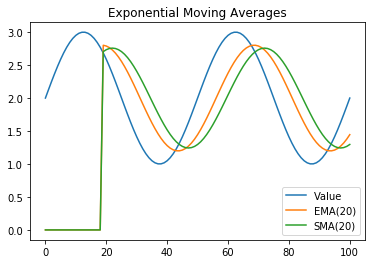

In [6]:
# Sine Wave Inputs
period = 50.0
amplitude = 2.0
sigma = 2.0
start = 0.0
end = 100.0
sineData = generateSineWave(period, amplitude, sigma, start, end)
calculateAndPlotSMAandEMA(sineData, 20, 20)

In the figure above, we use the same period (20) for both the SMA and EMA. We can see that the EMA tracks the Value signal with less lag than the SMA. This is because the EMA assigns more weight to the most recent values.

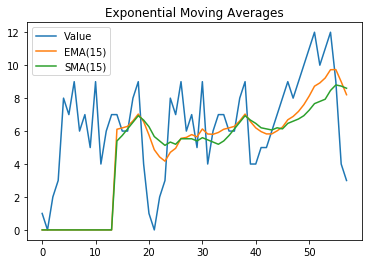

In [7]:
# Using some fictional data.
finalData = [1, 0, 2, 3, 8, 7, 9, 6, 7, 5, 9, 4, 6, 7, 7, 6, 6, 8, 9, 4, 
           1, 0, 2, 3, 8, 7, 9, 6, 7, 5, 9, 4, 6, 7, 7, 6, 6, 8, 9, 4,
           4, 5, 5, 6, 7, 8, 9, 8, 9, 10, 11, 12, 10, 11, 12, 9, 4, 3]
calculateAndPlotSMAandEMA(finalData, 15, 15)

## Function Testing Suite

In [8]:
# Testing Code

testData = [1, 0, 2, 3, 8]

#test_EMA1 = getEMA(testData, 2, 2)
#correctAns1 = 1.333
#assert abs(test_EMA1 - correctAns1) < 0.001

#test_EMA2 = getEMA(testData, 2, 3)
#correctAns2 = 1.286
#assert abs(test_EMA2 - correctAns2) < 0.001

#test_EMA3 = getEMA(testData, 2, 4)
#correctAns3 = 0.0
#assert abs(test_EMA3 - correctAns3) < 0.001

test_bottom = getDenominator(3)
print("test_bottom:", test_bottom)

test_top = getNumerator(testData,2, 3)
print("test_top:", test_top)

test_alpha1 = calculateAlpha(9)
correctAns8 = 0.20
assert abs(test_alpha1 - correctAns8) < 0.001


print("ALL TESTS PASSED.")


test_bottom: 1.75
test_top: 2.25
ALL TESTS PASSED.
